## *Wine Quality Prediction*

![Alt Text](wq.jpg)

## Problem Statement

#### This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).\
#### The main task is to predict the quality of wine using the given data.

#### This data frame contains the following columns:

#### Input variables (based on physicochemical tests):\
#### 1 - fixed acidity
#### 2 - volatile acidity
#### 3 - citric acid
#### 4 - residual sugar
#### 5 - chlorides
#### 6 - free sulfur dioxide
#### 7 - total sulfur dioxide
#### 8 - density
#### 9 - pH
#### 10 - sulphates
#### 11 - alcohol
#### Output variable (based on sensory data)
#### 12 - quality (score between 0 and 10)

# Approach

#### 1. Outlier Treatment
#### 2. Feature Engineering
#### 3. Bivariate Analysis
#### 4. Model Building
#####    4.1. SMOTE
#####    4.2. Scaling
#####    4.3. Transformation
#####    4.4. Predictive Modelling with and without hyperparameters
#### 5. Conclusion

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.shape

(1143, 13)

In [5]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
### no null values in the data

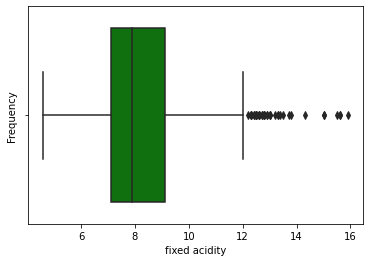

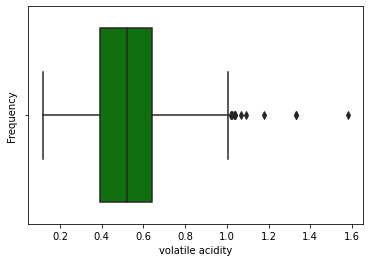

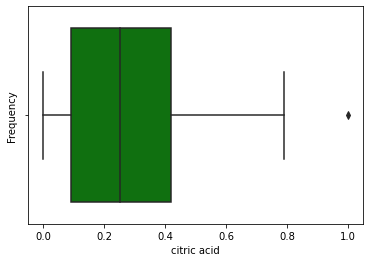

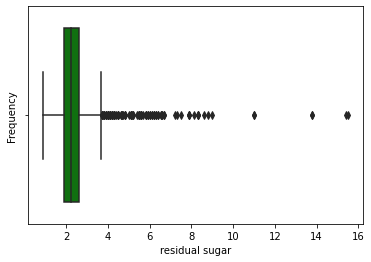

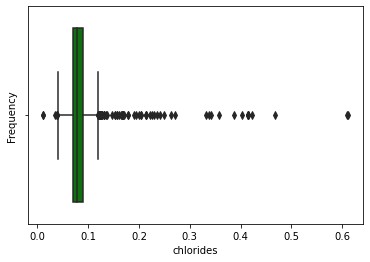

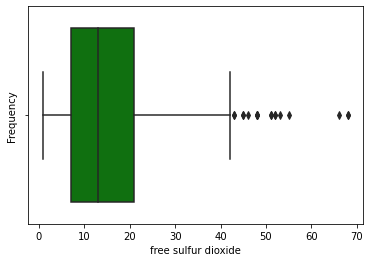

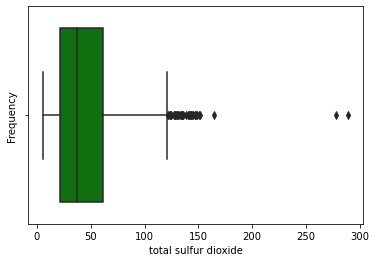

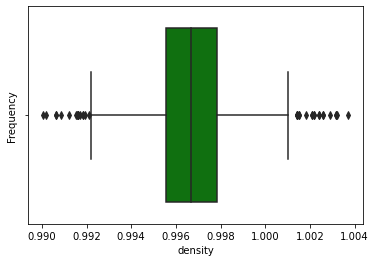

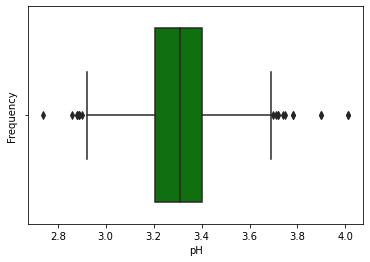

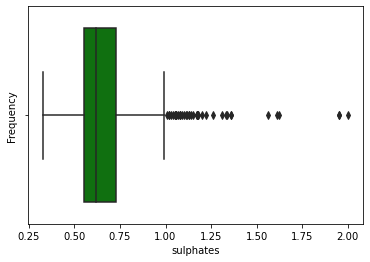

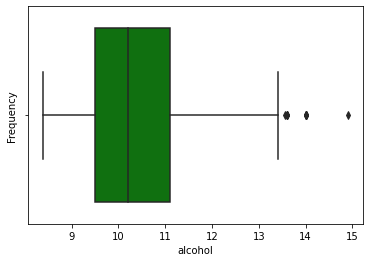

In [8]:
df1=df.drop(['Id','quality'],axis=1)
for column in df1.columns:
    sns.boxplot(df1[column],color='green')  # You can adjust the number of bins as desired
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
def treat_outliers_with_capping(dataframe, threshold=1.5):
    for column in dataframe.columns:
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        capped_values = np.clip(dataframe[column], lower_bound, upper_bound)
        dataframe[column] = capped_values


treat_outliers_with_capping(df1)

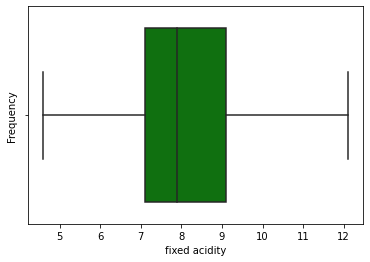

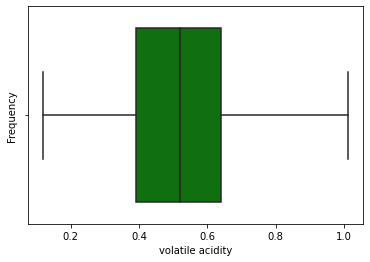

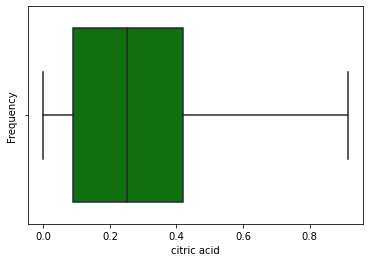

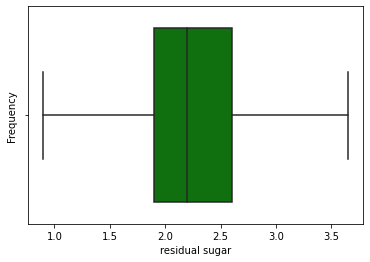

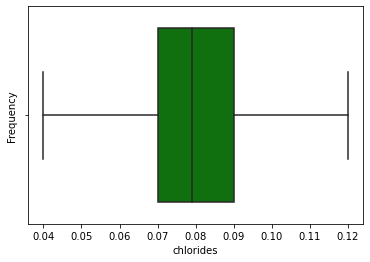

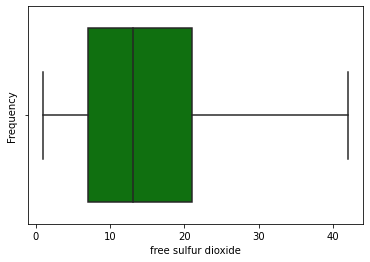

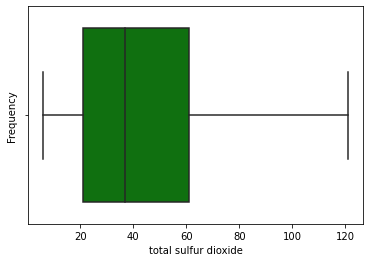

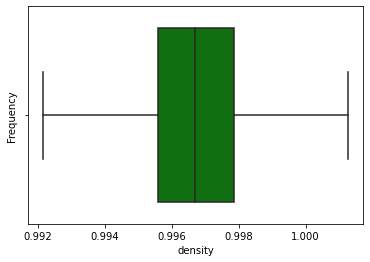

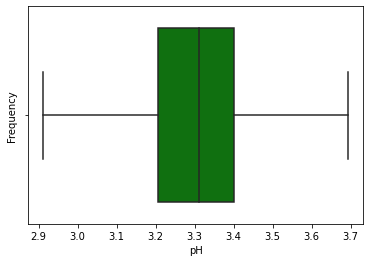

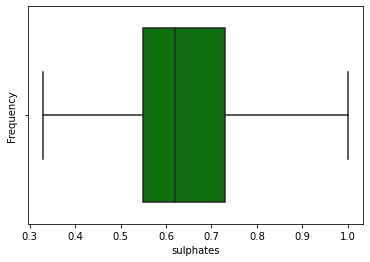

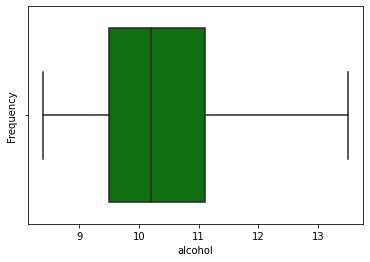

In [10]:
for column in df1.columns:
    sns.boxplot(df1[column],color='green')  # You can adjust the number of bins as desired
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
df2=df['quality']
df=pd.concat([df1,df2],axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


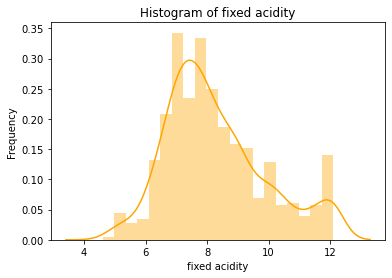

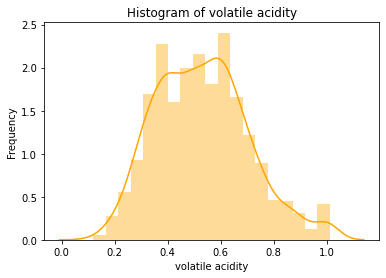

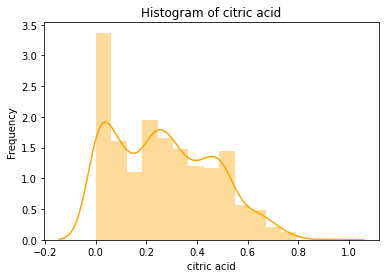

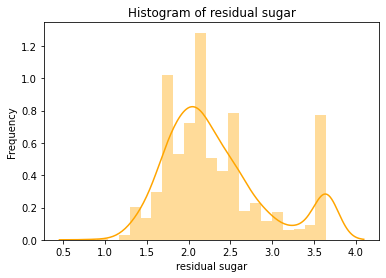

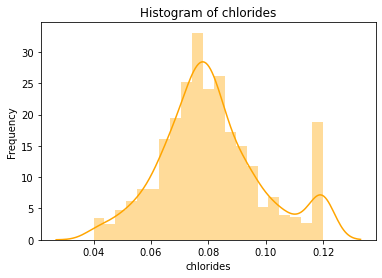

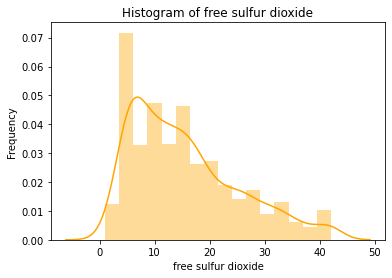

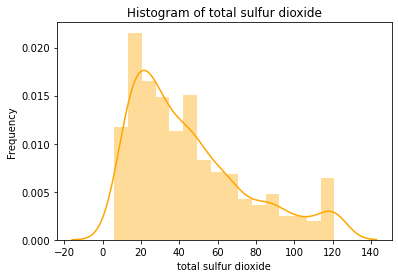

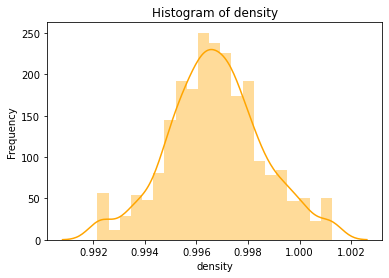

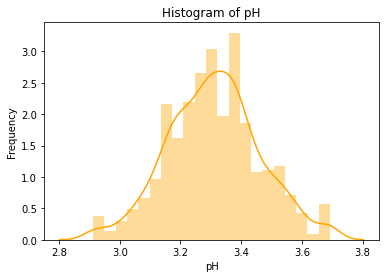

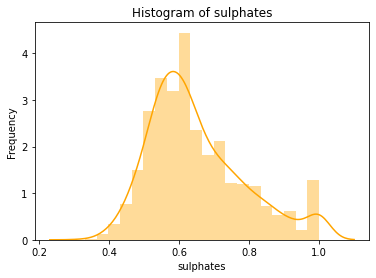

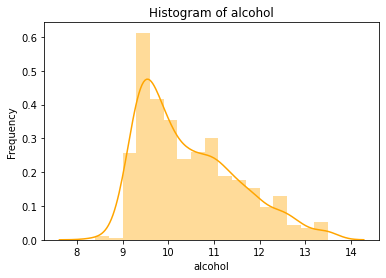

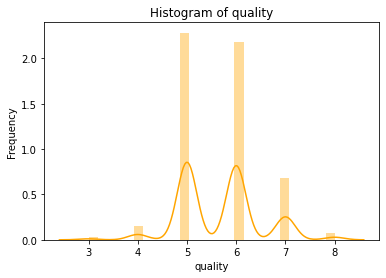

In [12]:
for column in df.columns:
    sns.distplot(df[column],color='orange')  # You can adjust the number of bins as desired
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [13]:
# There is skewness in the data

In [14]:
# Since there is an imbalance in the class and the number of samples for some particular classes is too less they were binned 
# three classes 'Good','Average' and 'Bad'

In [15]:
def target(x):
    if x<=4:
        return 'Bad'
    elif x<=6:
        return 'Average'
    else:
        return 'Good'
df['quality']=df['quality'].apply(target)
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Average


In [16]:
df['quality'].value_counts()

Average    945
Good       159
Bad         39
Name: quality, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['quality']=LE.fit_transform(df[['quality']])
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


In [18]:
df['quality'].value_counts()

0    945
2    159
1     39
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

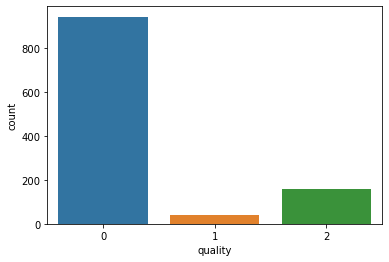

In [23]:
sns.countplot(df['quality'])

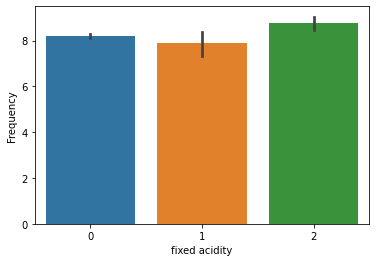

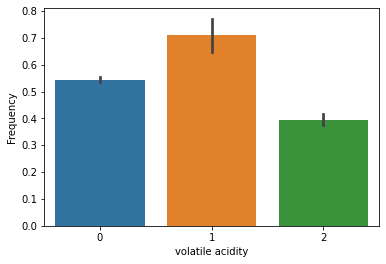

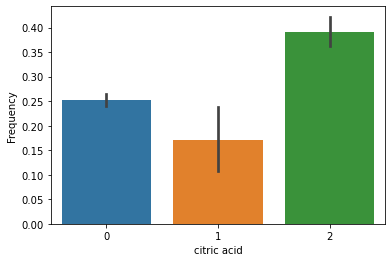

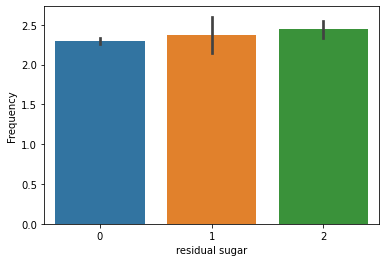

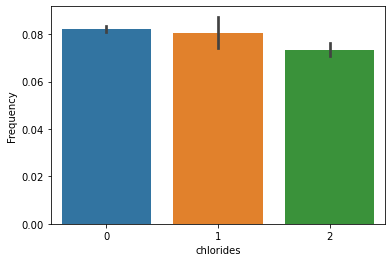

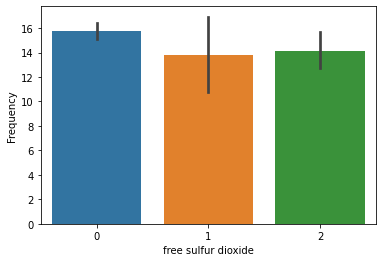

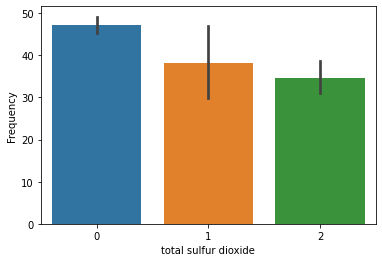

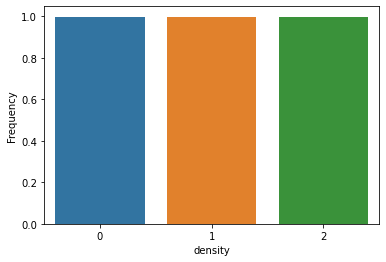

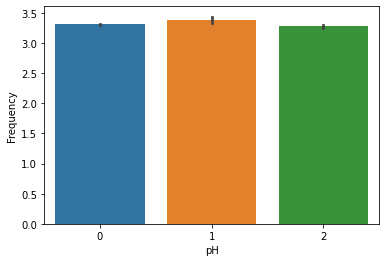

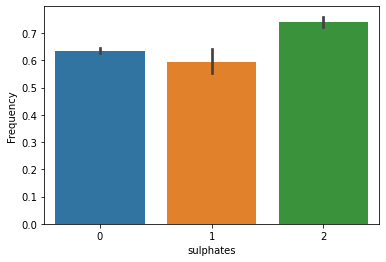

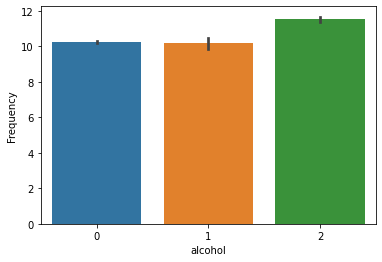

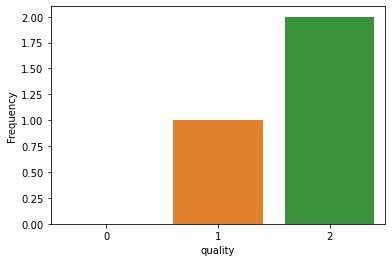

In [22]:
for column in df.columns:
    sns.barplot(df['quality'],df[column]) 
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Train Test Split

In [24]:
X=df.drop(['quality'],axis=1)
y=df['quality']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=100)

In [25]:
ytrain.value_counts()

0    746
2    137
1     31
Name: quality, dtype: int64

In [26]:
ytest.value_counts()

0    199
2     22
1      8
Name: quality, dtype: int64

### Smote

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={0:945, 2: 500, 1: 500},random_state=100)
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

In [28]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1945, 11)
(1945,)
(229, 11)
(229,)


In [29]:
ytrain.value_counts()

0    945
2    500
1    500
Name: quality, dtype: int64

In [30]:
ytest.value_counts()

0    199
2     22
1      8
Name: quality, dtype: int64

### Scaling and Transformation

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(xtrain)
xtrain_ss1 = ss.transform(xtrain)
xtest_ss1 = ss.transform(xtest)
xtrain_ss=pd.DataFrame(xtrain_ss1,columns=xtrain.columns)
xtest_ss=pd.DataFrame(xtest_ss1,columns=xtest.columns)

In [32]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')
pt.fit(xtrain_ss)
xtrain_pt1 = pt.transform(xtrain_ss)
xtest_pt1 = pt.transform(xtest_ss)
xtrain_pt=pd.DataFrame(xtrain_pt1,columns=xtrain.columns)
xtest_pt=pd.DataFrame(xtest_pt1,columns=xtest.columns)

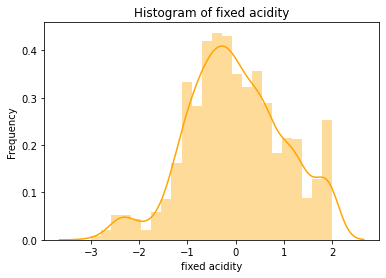

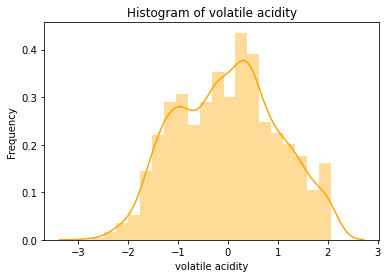

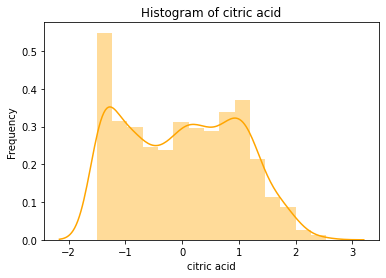

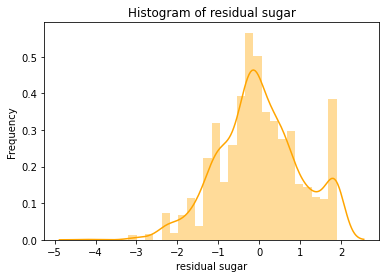

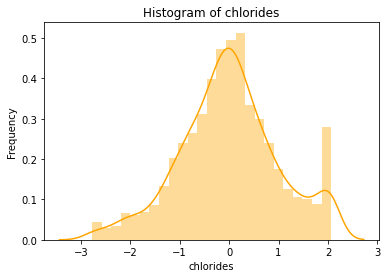

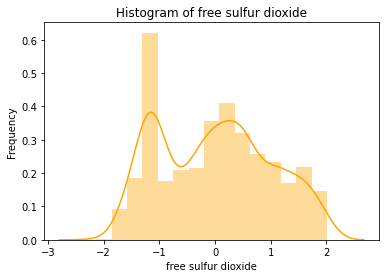

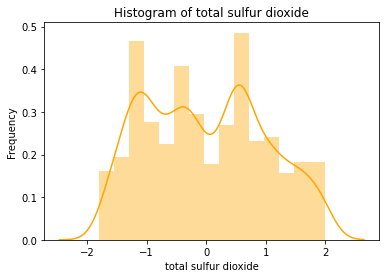

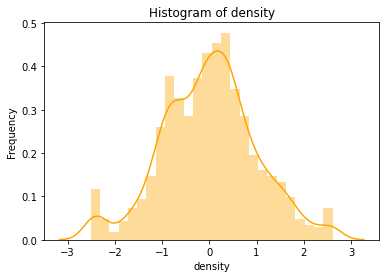

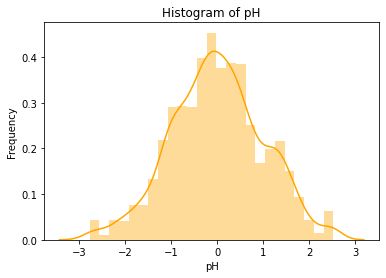

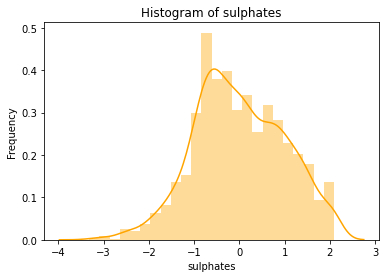

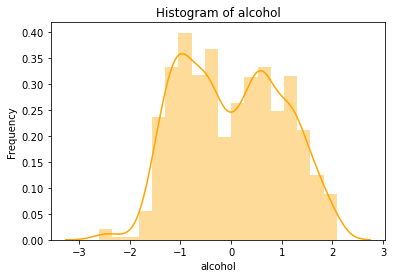

In [36]:
for column in xtrain_pt.columns:
    sns.distplot(xtrain_pt[column],color='orange')  # You can adjust the number of bins as desired
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [37]:
# Skewness reduced

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain_pt,ytrain)
dt_pred=dt.predict(xtest_pt)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       199
           1       0.10      0.25      0.14         8
           2       0.34      0.59      0.43        22

    accuracy                           0.75       229
   macro avg       0.45      0.54      0.47       229
weighted avg       0.83      0.75      0.78       229



### Decsion Tree with Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{'criterion': ['entropy','gini'], 
                    'max_depth': [5,10],  # 5,6,7,
                    'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3,% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]


dt = DecisionTreeClassifier(random_state = 100)
tree_grid = GridSearchCV(estimator = dt,param_grid =tuned_parameters,cv = 5)
tree_grid_model = tree_grid.fit(xtrain_pt,ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [41]:
dt_grid_model = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 5,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 8,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 100)
                                  


In [42]:
dt_grid_model=dt_grid_model.fit(xtrain_pt,ytrain)                                 
ypred_dt_tp=dt_grid_model.predict(xtest_pt)
print(classification_report(ytest,ypred_dt_tp))


              precision    recall  f1-score   support

           0       0.90      0.84      0.87       199
           1       0.17      0.25      0.20         8
           2       0.23      0.32      0.26        22

    accuracy                           0.77       229
   macro avg       0.43      0.47      0.44       229
weighted avg       0.81      0.77      0.79       229



### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(xtrain_pt,ytrain)

KNeighborsClassifier()

In [44]:
ypred_knn=knn.predict(xtest_pt)
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       199
           1       0.13      0.25      0.17         8
           2       0.36      0.73      0.48        22

    accuracy                           0.78       229
   macro avg       0.48      0.59      0.51       229
weighted avg       0.86      0.78      0.81       229



### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)
rf.fit(xtrain_pt,ytrain)

RandomForestClassifier(random_state=100)

In [46]:
ypred_rf_test=rf.predict(xtest_pt)
print(classification_report(ytest,ypred_rf_test))


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       199
           1       0.50      0.12      0.20         8
           2       0.44      0.50      0.47        22

    accuracy                           0.86       229
   macro avg       0.62      0.52      0.53       229
weighted avg       0.86      0.86      0.85       229



### Random Forest with hyperparameter Tuning

In [47]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]


In [48]:
rf_model = RandomForestClassifier(criterion ='gini', 
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =11 ,
                                  min_samples_leaf =5 ,
                                  min_samples_split = 2,
                                  random_state = 100)


rf_model.fit(xtrain_pt,ytrain)

ypred_rf_tp = rf_model.predict(xtest_pt)

print(classification_report(ytest,ypred_rf_tp))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       199
           1       0.11      0.12      0.12         8
           2       0.32      0.55      0.41        22

    accuracy                           0.79       229
   macro avg       0.45      0.50      0.47       229
weighted avg       0.83      0.79      0.80       229



### Bagging Classifier

#### Decision Tree (default)

In [49]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(random_state=100)        # by default it is decision tree
bc=BaggingClassifier(dt)
bc.fit(xtrain_pt,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=100))

In [50]:
ypred_bc=bc.predict(xtest_pt)
print(classification_report(ytest,ypred_bc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       199
           1       0.00      0.00      0.00         8
           2       0.45      0.45      0.45        22

    accuracy                           0.85       229
   macro avg       0.45      0.46      0.46       229
weighted avg       0.83      0.85      0.84       229



### XGBoost

In [51]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=100)        
xgb.fit(xtrain_pt,ytrain)
ypred_xgb=xgb.predict(xtest_pt)
print(classification_report(ytest,ypred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       199
           1       0.00      0.00      0.00         8
           2       0.52      0.55      0.53        22

    accuracy                           0.86       229
   macro avg       0.48      0.49      0.49       229
weighted avg       0.85      0.86      0.85       229



# Conclusion

#### The data consists of wine quality ranging from 3 to 8. Due to lower number of samples in certain classes they were classified into three categories namely good, bad and average which was later encoded to 0, 1 and 2. 
#### Accuracy is considered to be the main metric here and Random Forest, Bagging Classifier and XGBoost has given us the highest accuracy. 
#### However Bagging Classifier is not able to classify the 1 class effieciently and XGBoost is unable to identify a single 1 class. Meanwhile Random Forest without hyperparmeters is able to give an accuracy of 86% by also identifying every class decently. Thus Random Forest is our best fit classification model.